<a href="https://colab.research.google.com/github/TheWizard91/2/blob/main/Artificial_Intelligence_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
# Load libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Load the data
path= "/content/sample_data/WA_Fn-UseC_-Telco-Customer-Churn.csv"
telecom_customer_data = pd.read_csv(path, index_col=0)
telecom_customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [5]:
# Let us find the size of the data given at hand
telecom_customer_data.shape 

(7043, 20)

In [6]:
# Print out data check the datatypes
telecom_customer_data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [7]:
# We check whether or not the data was loaded propperly (checling that the types are right).
print(telecom_customer_data["tenure"].dtype,telecom_customer_data["MonthlyCharges"].dtype, telecom_customer_data["TotalCharges"].dtype)

int64 float64 object


In [8]:
# We make sure that the variable TotalCharge is indeed a type float.
# But we we saw that it is of type integer (look above).
telecom_customer_data["TotalCharges"]

customerID
7590-VHVEG      29.85
5575-GNVDE     1889.5
3668-QPYBK     108.15
7795-CFOCW    1840.75
9237-HQITU     151.65
               ...   
6840-RESVB     1990.5
2234-XADUH     7362.9
4801-JZAZL     346.45
8361-LTMKD      306.6
3186-AJIEK     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [9]:
# As you saw earlier, the vatiable TotalCharge was of type object
# so we change it into type float.
telecom_customer_data["TotalCharges"] = pd.to_numeric(telecom_customer_data["TotalCharges"], errors='coerce')

In [10]:
# We check that the types are the right ones.
print(telecom_customer_data["tenure"].dtype,telecom_customer_data["MonthlyCharges"].dtype, telecom_customer_data["TotalCharges"].dtype)

int64 float64 float64


In [11]:
# Now we are checking if there is any missing values.
telecom_customer_data.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [12]:
# Getting the mean of the variable TotalCharges
# because we are going to use it for the NaN values.
telecom_customer_data['TotalCharges'].mean()

2283.3004408418697

In [13]:
# Now we are going to replace all te Nan values of the variable
# TotalCharges with its won mean as found above.
telecom_customer_data['TotalCharges'].fillna(telecom_customer_data['TotalCharges'].mean(), inplace= True)
telecom_customer_data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [14]:
# Let us check the missing values after we have changed the type of the data.
# You will see that they are all 0 - no more missing values, no more Nan values.
telecom_customer_data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
#I am changing Senior Citizen column to No and Yes becuase it makes the graph more understandable.
telecom_customer_data.SeniorCitizen = telecom_customer_data.SeniorCitizen.replace({0:"No",1:"Yes"})

In [16]:
telecom_customer_data

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,Female,No,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
5575-GNVDE,Male,No,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
3668-QPYBK,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
7795-CFOCW,Male,No,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
9237-HQITU,Female,No,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,Male,No,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.50,No
2234-XADUH,Female,No,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.90,No
4801-JZAZL,Female,No,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No


In [17]:
# We want to get more insight to the data at hand so I wen to on using the .describe()
telecom_customer_data.describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2265.000258
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1400.550000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


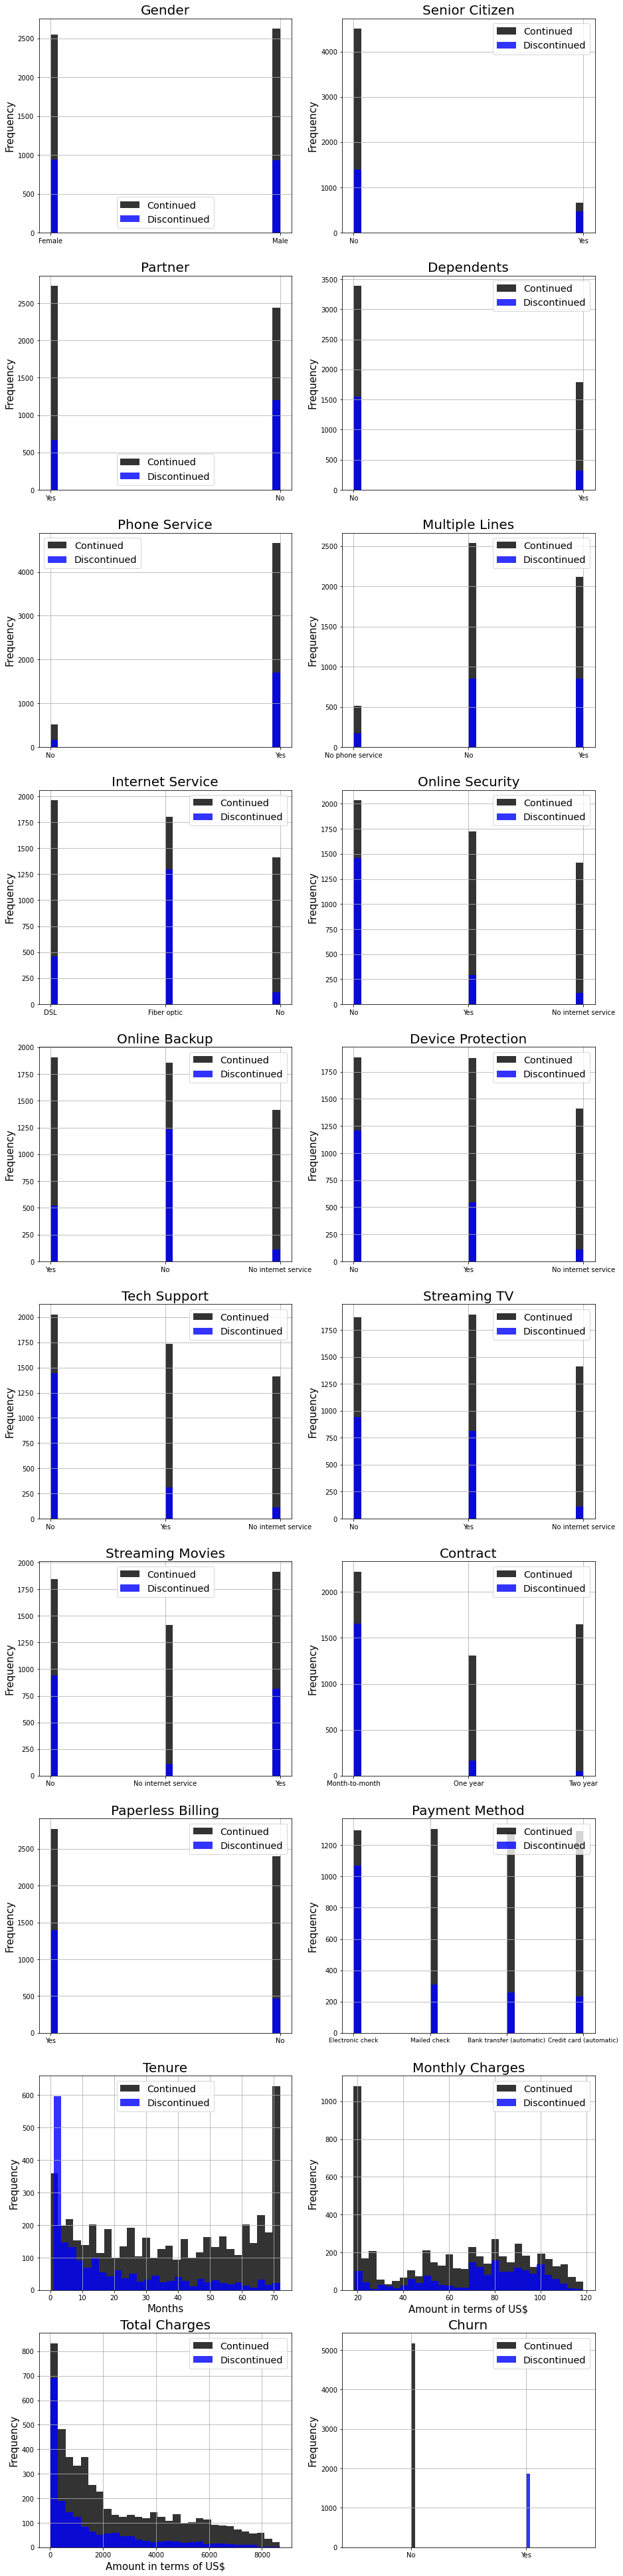

In [18]:
# Graphs visualizing the univariate distribution for each input variable and target variable
# I struggled to fing the right way of doing the graph and it took me hell lot of time
# I also had to move the little box right, left up or donwn depending on how the 
# bars of the graph look like.... I had to do lots of research and I did have some helps asking 
# how to debug and style a bit becuase I had lots of errors and I worked in this project since summer
# despite the fact I was busy with work so I hope you appreciate it, by the way... 
# Now I graph them in the order they came look at table above.

fig = plt.figure(figsize=(15,70))

gender_gradph = fig.add_subplot(10,2,1)
telecom_customer_data[telecom_customer_data.Churn == "No"]["gender"].hist(bins=30, color="black", alpha=0.8, label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["gender"].hist(bins=30, color="blue", alpha=0.8, label= "Discontinued")
gender_gradph.set_title("Gender",fontsize=20)
gender_gradph.set_ylabel("Frequency", fontsize=15)
gender_gradph.legend(loc= 0, fontsize= "x-large" )

senior_cotozen_graph = fig.add_subplot(10,2,2)
telecom_customer_data[telecom_customer_data.Churn == "No"]["SeniorCitizen"].hist(bins=30, color="black", alpha=0.8, label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["SeniorCitizen"].hist(bins=30, color="blue", alpha=0.8, label= "Discontinued")
senior_cotozen_graph.set_title("Senior Citizen",fontsize=20)
senior_cotozen_graph.set_ylabel("Frequency", fontsize=15)
senior_cotozen_graph.legend(loc= 0, fontsize= "x-large" )
senior_cotozen_graph.legend(loc= 0, fontsize= "x-large" )

partner_graph = fig.add_subplot(10,2,3)
telecom_customer_data[telecom_customer_data.Churn == "No"]["Partner"].hist(bins=30, color="black", alpha=0.8, label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["Partner"].hist(bins=30, color="blue", alpha=0.8, label= "Discontinued")
partner_graph.set_title("Partner",fontsize=20)
partner_graph.set_ylabel("Frequency", fontsize=15)
partner_graph.legend(loc= 0, fontsize= "x-large" )
partner_graph.legend(loc= 0, fontsize= "x-large" )

dependents_grpah = fig.add_subplot(10,2,4)
telecom_customer_data[telecom_customer_data.Churn == "No"]["Dependents"].hist(bins=30, color="black", alpha=0.8, label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["Dependents"].hist(bins=30, color="blue", alpha=0.8, label= "Discontinued")
dependents_grpah.set_title("Dependents", fontsize=20)
dependents_grpah.set_ylabel("Frequency", fontsize=15)
dependents_grpah.legend(loc= 0, fontsize= "x-large" )
dependents_grpah.legend(loc= 0, fontsize= "x-large" )

phone_service_graph = fig.add_subplot(10,2,5)
telecom_customer_data[telecom_customer_data.Churn == "No"]["PhoneService"].hist(bins=30, color="black", alpha=0.8, label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["PhoneService"].hist(bins=30, color="blue", alpha=0.8, label= "Discontinued")
phone_service_graph.set_title("Phone Service",fontsize=20)
phone_service_graph.set_ylabel("Frequency", fontsize=15)
phone_service_graph.legend(loc= 0, fontsize= "x-large" )

multiple_lines_graph = fig.add_subplot(10,2,6)
telecom_customer_data[telecom_customer_data.Churn == "No"]["MultipleLines"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["MultipleLines"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
multiple_lines_graph.set_title("Multiple Lines",fontsize=20)
multiple_lines_graph.set_ylabel("Frequency", fontsize=15)
multiple_lines_graph.legend(loc= 0, fontsize= "x-large" )

internet_service_graph = fig.add_subplot(10,2,7)
telecom_customer_data[telecom_customer_data.Churn == "No"]["InternetService"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["InternetService"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
internet_service_graph.set_title("Internet Service",fontsize=20)
internet_service_graph.set_ylabel("Frequency", fontsize=15)
internet_service_graph.legend(loc= 0, fontsize= "x-large" )
internet_service_graph.legend(loc= 0, fontsize= "x-large" )

onmline_security_graph = fig.add_subplot(10,2,8)
telecom_customer_data[telecom_customer_data.Churn == "No"]["OnlineSecurity"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["OnlineSecurity"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
onmline_security_graph.set_title("Online Security",fontsize=20)
onmline_security_graph.set_ylabel("Frequency", fontsize=15)
onmline_security_graph.legend(loc= 0, fontsize= "x-large" )

online_backup_graph = fig.add_subplot(10,2,9)
telecom_customer_data[telecom_customer_data.Churn == "No"]["OnlineBackup"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["OnlineBackup"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
online_backup_graph.set_title("Online Backup",fontsize=20)
online_backup_graph.set_ylabel("Frequency", fontsize=15)
online_backup_graph.legend(loc= 0, fontsize= "x-large" )

device_backup_graph = fig.add_subplot(10,2,10)
telecom_customer_data[telecom_customer_data.Churn == "No"]["DeviceProtection"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["DeviceProtection"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
device_backup_graph.set_title("Device Protection",fontsize=20)
device_backup_graph.set_ylabel("Frequency", fontsize=15)
device_backup_graph.legend(loc= 0, fontsize= "x-large" )

tech_support_graph = fig.add_subplot(10,2,11)
telecom_customer_data[telecom_customer_data.Churn == "No"]["TechSupport"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["TechSupport"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
tech_support_graph.set_title("Tech Support",fontsize=20)
tech_support_graph.set_ylabel("Frequency", fontsize=15)
tech_support_graph.legend(loc= 0, fontsize= "x-large" )

streaming_tv_graph = fig.add_subplot(10,2,12)
telecom_customer_data[telecom_customer_data.Churn == "No"]["StreamingTV"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["StreamingTV"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
streaming_tv_graph.set_title("Streaming TV",fontsize=20)
streaming_tv_graph.set_ylabel("Frequency", fontsize=15)
streaming_tv_graph.legend(loc= 0, fontsize= "x-large" )

streaming_movies_graph = fig.add_subplot(10,2,13)
telecom_customer_data[telecom_customer_data.Churn == "No"]["StreamingMovies"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["StreamingMovies"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
streaming_movies_graph.set_title("Streaming Movies",fontsize=20)
streaming_movies_graph.set_ylabel("Frequency", fontsize=15)
streaming_movies_graph.legend(loc= 0, fontsize= "x-large" )

contract_graph = fig.add_subplot(10,2,14)
telecom_customer_data[telecom_customer_data.Churn == "No"]["Contract"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["Contract"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
contract_graph.set_title("Contract",fontsize=20)
contract_graph.set_ylabel("Frequency", fontsize=15)
contract_graph.legend(loc= 0, fontsize= "x-large" )

paperless_billing_graph = fig.add_subplot(10,2,15)
telecom_customer_data[telecom_customer_data.Churn == "No"]["PaperlessBilling"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["PaperlessBilling"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
paperless_billing_graph.set_title("Paperless Billing",fontsize=20)
paperless_billing_graph.set_ylabel("Frequency", fontsize=15)
paperless_billing_graph.legend(loc= 0, fontsize= "x-large" )

payment_method_graph = fig.add_subplot(10,2,16)
telecom_customer_data[telecom_customer_data.Churn == "No"]["PaymentMethod"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["PaymentMethod"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
payment_method_graph.set_title("Payment Method",fontsize=20)
payment_method_graph.set_ylabel("Frequency", fontsize= 15)
payment_method_graph.legend(loc= 0, fontsize= "x-large" )
payment_method_graph.tick_params(axis='x', which='major', labelsize= 9)

tenure_graph = fig.add_subplot(10,2,17)
telecom_customer_data[telecom_customer_data.Churn == "No"]["tenure"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["tenure"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
tenure_graph.set_title("Tenure",fontsize=20)
tenure_graph.set_ylabel("Frequency", fontsize=15)
tenure_graph.set_xlabel("Months", fontsize=15)
tenure_graph.legend(loc= 0, fontsize= "x-large" )
tenure_graph.legend(loc= 0, fontsize= "x-large" )

monthly_charges_graph = fig.add_subplot(10,2,18)
telecom_customer_data[telecom_customer_data.Churn == "No"]["MonthlyCharges"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["MonthlyCharges"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
monthly_charges_graph.set_title("Monthly Charges",fontsize=20)
monthly_charges_graph.set_ylabel("Frequency", fontsize=15)
monthly_charges_graph.set_xlabel("Amount in terms of US$", fontsize=15)
monthly_charges_graph.legend(loc= 0, fontsize= "x-large" )

total_charges_graph = fig.add_subplot(10,2,19)
telecom_customer_data[telecom_customer_data.Churn == "No"]["TotalCharges"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["TotalCharges"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
total_charges_graph.set_title("Total Charges",fontsize=20)
total_charges_graph.set_ylabel("Frequency", fontsize=15)
total_charges_graph.set_xlabel("Amount in terms of US$", fontsize=15)
total_charges_graph.legend(loc= 0, fontsize= "x-large" )

churn_graph = fig.add_subplot(10,2,20)
telecom_customer_data[telecom_customer_data.Churn == "No"]["Churn"].hist(bins=30, color="black", alpha=0.8,label= "Continued")
telecom_customer_data[telecom_customer_data.Churn == "Yes"]["Churn"].hist(bins=30, color="blue", alpha=0.8,label= "Discontinued")
churn_graph.set_title("Churn",fontsize=20)
churn_graph.set_ylabel("Frequency", fontsize=15)
churn_graph.legend(loc= 0, fontsize= "x-large" )

In [19]:
# Implementing the one-hot-encoding here.
telecom_customer_data_df = pd.get_dummies(telecom_customer_data)
telecom_customer_data_df

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,1,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5575-GNVDE,34,56.95,1889.50,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,1,0
3668-QPYBK,2,53.85,108.15,0,1,1,0,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
7795-CFOCW,45,42.30,1840.75,0,1,1,0,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0,1,0
9237-HQITU,2,70.70,151.65,1,0,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,24,84.80,1990.50,0,1,1,0,0,1,0,1,0,1,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,0,1,1,0
2234-XADUH,72,103.20,7362.90,1,0,1,0,0,1,0,1,0,1,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,0,1,0,0,1,0
4801-JZAZL,11,29.60,346.45,1,0,1,0,0,1,0,1,1,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0


In [20]:
# I am now separating x values for train-split
X = telecom_customer_data_df.drop(['Churn_Yes', 'Churn_No', 'gender_Female', 'Partner_No','Dependents_No', 'PhoneService_No',
'PaperlessBilling_No'], axis=1)
X.head()

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,1,29.85,29.85,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
5575-GNVDE,34,56.95,1889.50,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
3668-QPYBK,2,53.85,108.15,1,1,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1
7795-CFOCW,45,42.30,1840.75,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,0,1,0,0,0
9237-HQITU,2,70.70,151.65,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0


In [21]:
# Doing the same separation for y values.
y = telecom_customer_data_df['Churn_No']
y.head()

customerID
7590-VHVEG    1
5575-GNVDE    1
3668-QPYBK    0
7795-CFOCW    1
9237-HQITU    0
Name: Churn_No, dtype: uint8

In [22]:
# Gaining more insight baout the data (the trained one)
telecom_customer_data_df.describe()

,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_No,Churn_Yes
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2283.300441,0.495244,0.504756,0.837853,0.162147,0.516967,0.483033,0.700412,0.299588,0.096834,0.903166,0.481329,0.096834,0.421837,0.343746,0.439585,0.216669,0.496663,0.216669,0.286668,0.438450,0.216669,0.344881,0.439443,0.216669,0.343888,0.493114,0.216669,0.290217,0.398978,0.216669,0.384353,0.395428,0.216669,0.387903,0.550192,0.209144,0.240664,0.407781,0.592219,0.219225,0.216101,0.335794,0.228880,0.734630,0.265370
std,24.559481,30.090047,2265.000258,0.500013,0.500013,0.368612,0.368612,0.499748,0.499748,0.458110,0.458110,0.295752,0.295752,0.499687,0.295752,0.493888,0.474991,0.496372,0.412004,0.500024,0.412004,0.452237,0.496232,0.412004,0.475363,0.496355,0.412004,0.475038,0.499988,0.412004,0.453895,0.489723,0.412004,0.486477,0.488977,0.412004,0.487307,0.497510,0.406726,0.427517,0.491457,0.491457,0.413751,0.411613,0.472301,0.420141,0.441561,0.441561
min,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,9.000000,35.500000,402.225000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,29.000000,70.350000,1400.550000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,55.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.00

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.2, random_state=42)

In [24]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
train_sc = scaler.fit_transform(X_train[["MonthlyCharges", "TotalCharges", "tenure"]])
test_sc = scaler.transform(X_test[["MonthlyCharges", "TotalCharges", "tenure"]])


In [25]:
X_train[["MonthlyCharges", "TotalCharges", "tenure"]] = train_sc

In [26]:
X_test[["MonthlyCharges", "TotalCharges", "tenure"]] = test_sc
X_test

,tenure,MonthlyCharges,TotalCharges,gender_Male,SeniorCitizen_No,SeniorCitizen_Yes,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
customerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1024-GUALD,-1.284605,-1.331629,-1.002388,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
0484-JPBRU,0.353238,-1.316672,-0.572634,1,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,1,1,0,0,0
3620-EHIMZ,0.803645,-1.512772,-0.557043,0,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1
6910-HADCM,-1.284605,0.381756,-0.979588,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0
8587-XYZSF,1.417836,-0.475768,0.428565,1,1,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2845-KDHVX,1.294997,0.114195,0.923359,0,1,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,0,1
5027-YOCXN,0.762699,1.501854,1.501702,1,1,0,1,1,1,0,0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0
8884-MRNSU,-0.629468,-1.494492,-0.867511,1,1,0,1,1,1,1,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0


In [27]:
# Printing values to see how the shapes are. Now to the next step.
print("X:", X.shape,"y:", y.shape, "X_train:", X_train.shape, "X_test:", X_test.shape,"y_train",y_train.shape,
"y_test",y_test.shape)

X: (7043, 41) y: (7043,) X_train: (5634, 41) X_test: (1409, 41) y_train (5634,) y_test (1409,)


In [28]:
# In order for us to find the optimal parameters I am going to use GridSearch 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
parameter_of_logistic_regression = {'C': np.arange(.1, 5, .1)}
logistic_regression = LogisticRegression(solver='lbfgs', max_iter=1000)
logistic_regression_optimized = GridSearchCV(logistic_regression, parameter_of_logistic_regression, cv=5)
logistic_regression_optimized.fit(X_train, y_train)
print('Logistic Regression - Best Parameters: ', logistic_regression_optimized.best_params_)
prediction_of_logistic_regression_optmized = logistic_regression_optimized.predict(X_test)

Logistic Regression - Best Parameters:  {'C': 2.7}


In [29]:
# Same story.
from sklearn.svm import SVC
support_vector_machines_parameters = {'C': np.arange(1, 2, 1),
"gamma": ["scale", "auto"]}
support_vector_machine = SVC(kernel= 'rbf')
support_vector_machine_optimized = GridSearchCV(support_vector_machine, support_vector_machines_parameters, cv=5)
support_vector_machine_optimized.fit(X_train, y_train)
print('SVM best C value', support_vector_machine_optimized.best_params_, '\n')
prediction_of_support_vector_machine_optimized = support_vector_machine_optimized.predict(X_test)

SVM best C value {'C': 1, 'gamma': 'auto'} 



In [30]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
# Same
k_neighbors_classifier_parameters = {'n_neighbors': np.arange(1, 25)}
k_neighbor_classifier = KNeighborsClassifier()
k_neighbor_classifier_optimized = GridSearchCV(k_neighbor_classifier, k_neighbors_classifier_parameters, cv=5)
k_neighbor_classifier_optimized.fit(X_train, y_train)
print('KNN best number of neighbors:', k_neighbor_classifier_optimized.best_params_, '\n')
prediction_of_k_neighbor_classifier_optimized = k_neighbor_classifier_optimized.predict(X_test)

KNN best number of neighbors: {'n_neighbors': 19} 



In [31]:
#Performing GridSearch to find the optimal parameters
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
decision_tree_parameters = {'splitter': ['best', 'random'],
"max_depth" : np.arange(1,4,1),
'max_features': [ None ,'auto', 'sqrt', 'log2'],
'criterion': ['gini', 'entropy']}
decision_tree_cassifier = DecisionTreeClassifier()
decision_tree_cassifier_optimized = GridSearchCV(decision_tree_cassifier,decision_tree_parameters, cv=5)
decision_tree_cassifier_optimized.fit(X_train, y_train)
print('Decision Tree - Best Parameters: ', decision_tree_cassifier_optimized.best_params_)
prediction_of_decision_tree_cassifier_optimized = decision_tree_cassifier_optimized.predict(X_test)

Decision Tree - Best Parameters:  {'criterion': 'gini', 'max_depth': 3, 'max_features': None, 'splitter': 'best'}


In [32]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
# Same but this time we are also defining parameter grid for RandomizedSearch to start the train model.
raindom_forest_parameters = {'n_estimators': np.arange(10, 2000, 10),
'max_features': ['auto', 'sqrt'],
'max_depth': np.arange(10, 200, 10),
'criterion': ['gini', 'entropy'],
'bootstrap': [True, False]}
randomized_search_classifier = RandomForestClassifier(n_jobs=-1)
randomized_search_classifier_optimized = RandomizedSearchCV(estimator=randomized_search_classifier, param_distributions=raindom_forest_parameters, cv=5, verbose=0)
randomized_search_classifier_optimized.fit(X_train, y_train)
print('Random Forest - Best Parameters: ', randomized_search_classifier_optimized.best_params_)
prediction_of_randomized_search_classifier_optimized = randomized_search_classifier_optimized.predict(X_test)

Random Forest - Best Parameters:  {'n_estimators': 1560, 'max_features': 'sqrt', 'max_depth': 130, 'criterion': 'gini', 'bootstrap': True}


In [33]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
acurracy_score_of_logistic_regression=accuracy_score(y_test, prediction_of_logistic_regression_optmized)
precision_sscore_of_logistic_regression = precision_score(y_test, prediction_of_logistic_regression_optmized)
recall_score_of_logistic_regression = recall_score(y_test, prediction_of_logistic_regression_optmized)
f1_score_of_logistic_regression = f1_score(y_test, prediction_of_logistic_regression_optmized)
print("Acurracy Score:",acurracy_score_of_logistic_regression,
      "\nPrecision Score:",precision_sscore_of_logistic_regression, 
      "\nRecall Score:",recall_score_of_logistic_regression, 
      "\nF1 Score:", f1_score_of_logistic_regression)

Acurracy Score: 0.8204400283889283 
Precision Score: 0.8614958448753463 
Recall Score: 0.9005791505791506 
F1 Score: 0.880604058518169


In [34]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
acurracy_score_of_support_vector_machines=accuracy_score(y_test, prediction_of_support_vector_machine_optimized)
precision_score_of_support_vector_machines = precision_score(y_test, prediction_of_support_vector_machine_optimized)
recall_score_of_support_vector_machines = recall_score(y_test, prediction_of_support_vector_machine_optimized)
f1_score_of_support_vector_machines = f1_score(y_test, prediction_of_support_vector_machine_optimized)
print("Acurracy Score of Support Vector Mahines:",acurracy_score_of_support_vector_machines,
      "\nPrecision Score of Support Vector Mahines:",precision_score_of_support_vector_machines, 
      "\nRecall Score of Support Vector Mahines:",recall_score_of_support_vector_machines, 
      "\nF1 Score of Support Vector Mahines:", f1_score_of_support_vector_machines)

Acurracy Score of Support Vector Mahines: 0.8161816891412349 
Precision Score of Support Vector Mahines: 0.8422907488986784 
Recall Score of Support Vector Mahines: 0.9227799227799228 
F1 Score of Support Vector Mahines: 0.8807001381851681


In [35]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
acurracy_score_of_k_neighbor_calssifier=accuracy_score(y_test, prediction_of_k_neighbor_classifier_optimized)
precision_score_of_k_neighbor_calssifier = precision_score(y_test, prediction_of_k_neighbor_classifier_optimized)
recall_score_of_k_neighbor_calssifier = recall_score(y_test, prediction_of_k_neighbor_classifier_optimized)
f1_score_of_k_neighbor_calssifier = f1_score(y_test, prediction_of_k_neighbor_classifier_optimized)
print("Acurracy Score of K Neighbors Classifier:",acurracy_score_of_k_neighbor_calssifier,
      "\nPrecision Score of K Neighbors Classifier:",precision_score_of_k_neighbor_calssifier, 
      "\nRecall Score of K Neighbors Classifier:",recall_score_of_k_neighbor_calssifier, 
      "\nF1 Score of K Neighbors Classifier:", f1_score_of_k_neighbor_calssifier)

Acurracy Score of K Neighbors Classifier: 0.8041163946061036 
Precision Score of K Neighbors Classifier: 0.8591682419659735 
Recall Score of K Neighbors Classifier: 0.8774131274131274 
F1 Score of K Neighbors Classifier: 0.8681948424068768


In [36]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
acurracy_score_of_decision_tree=accuracy_score(y_test, prediction_of_decision_tree_cassifier_optimized)
precision_score_of_decision_tree = precision_score(y_test, prediction_of_decision_tree_cassifier_optimized)
recall_score_of_decision_tree = recall_score(y_test, prediction_of_decision_tree_cassifier_optimized)
f1_score_of_decision_tree = f1_score(y_test, prediction_of_decision_tree_cassifier_optimized)
print("Acurracy Score of Decision Tree:",acurracy_score_of_decision_tree,
      "\nPrecision Score of Decision Tree:",precision_score_of_decision_tree, 
      "\nRecall Score of Decision Tree:",recall_score_of_decision_tree, 
      "\nF1 Score of Decision Tree:", f1_score_of_decision_tree)

Acurracy Score of Decision Tree: 0.7955997161107168 
Precision Score of Decision Tree: 0.8111480865224625 
Recall Score of Decision Tree: 0.9411196911196911 
F1 Score of Decision Tree: 0.8713136729222519


In [37]:
from sklearn.metrics import accuracy_score,precision_score, recall_score, f1_score
acurracy_score_of_random_forest=accuracy_score(y_test, prediction_of_randomized_search_classifier_optimized)
precision_score_of_random_forest = precision_score(y_test, prediction_of_randomized_search_classifier_optimized)
recall_score_of_random_forest = recall_score(y_test, prediction_of_randomized_search_classifier_optimized)
f1_score_of_random_forest = f1_score(y_test, prediction_of_randomized_search_classifier_optimized)
print("Acurracy Score of the Random Forest:",acurracy_score_of_random_forest,
      "\nPrecision Score of the Random Forest:",precision_score_of_random_forest, 
      "\nRecall Score of the Random Forest:",recall_score_of_random_forest, 
      "\nF1 Score of the Random Forest:", f1_score_of_random_forest)

Acurracy Score of the Random Forest: 0.7934705464868701 
Precision Score of the Random Forest: 0.8264680105170903 
Recall Score of the Random Forest: 0.9102316602316602 
F1 Score of the Random Forest: 0.8663298116674322


In [38]:
# Create Decision Tree classifer object
from sklearn.tree import DecisionTreeClassifier
decision_tree_classifier_two = DecisionTreeClassifier(**decision_tree_cassifier_optimized.best_params_)

# Train Decision Tree Classifer
decision_tree_classifier_two = decision_tree_classifier_two.fit(X_train,y_train)
#Predict the response for test dataset
y_pred2 = decision_tree_classifier_two.predict(X_test)

Text(0.5, 0, 'Feature Importance Score')

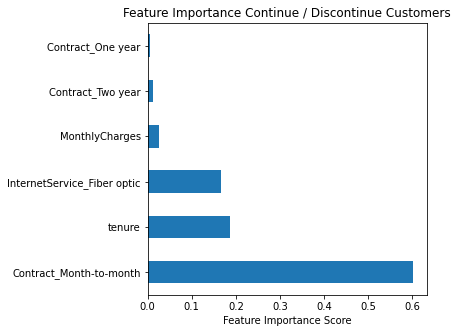

In [39]:
plt.figure(figsize = (5,5))
importance = pd.Series(decision_tree_classifier_two.feature_importances_, index=X.columns).sort_values(ascending=True)
importance.nlargest(6).plot(kind='barh')
plt.title("Feature Importance Continue / Discontinue Customers")
plt.xlabel("Feature Importance Score")

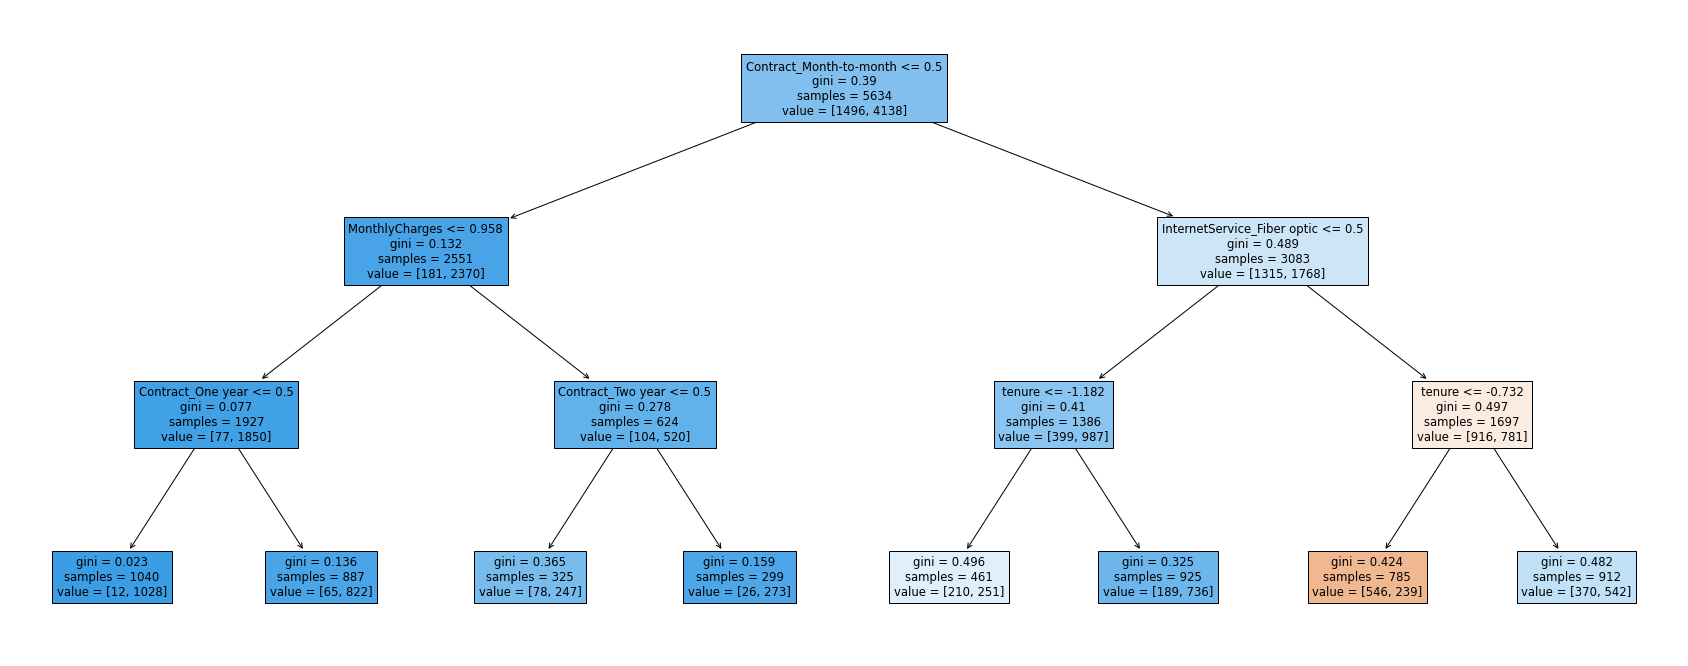

In [40]:
from sklearn.tree import plot_tree
plt.figure(figsize=(30,12))
plot_tree(decision_tree_classifier_two, feature_names=X.columns, filled=True)
plt.show()